In [1]:
import pyxdf
import PyQt5
import mne
import numpy as np
import pathlib
import mne
import matplotlib
import matplotlib.pyplot as plt
# For interactive plots
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')
from subfunctions import read_xdf, add_annot

In [2]:
current_path = pathlib.Path().absolute()  
data_fname = current_path /'Data'/'P300_Dana.xdf'

raw,events = read_xdf(fname = data_fname)
raw = add_annot(raw, events)

2 streams loaded
Creating RawArray with float64 data, n_channels=13, n_times=90415
    Range : 0 ... 90414 =      0.000 ...   723.312 secs
Ready.


## Prepro

In [4]:
raw.filter(l_freq=0.5,h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 825 samples (6.600 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished


<RawArray | 13 x 90415 (723.3 s), ~9.0 MB, data loaded>

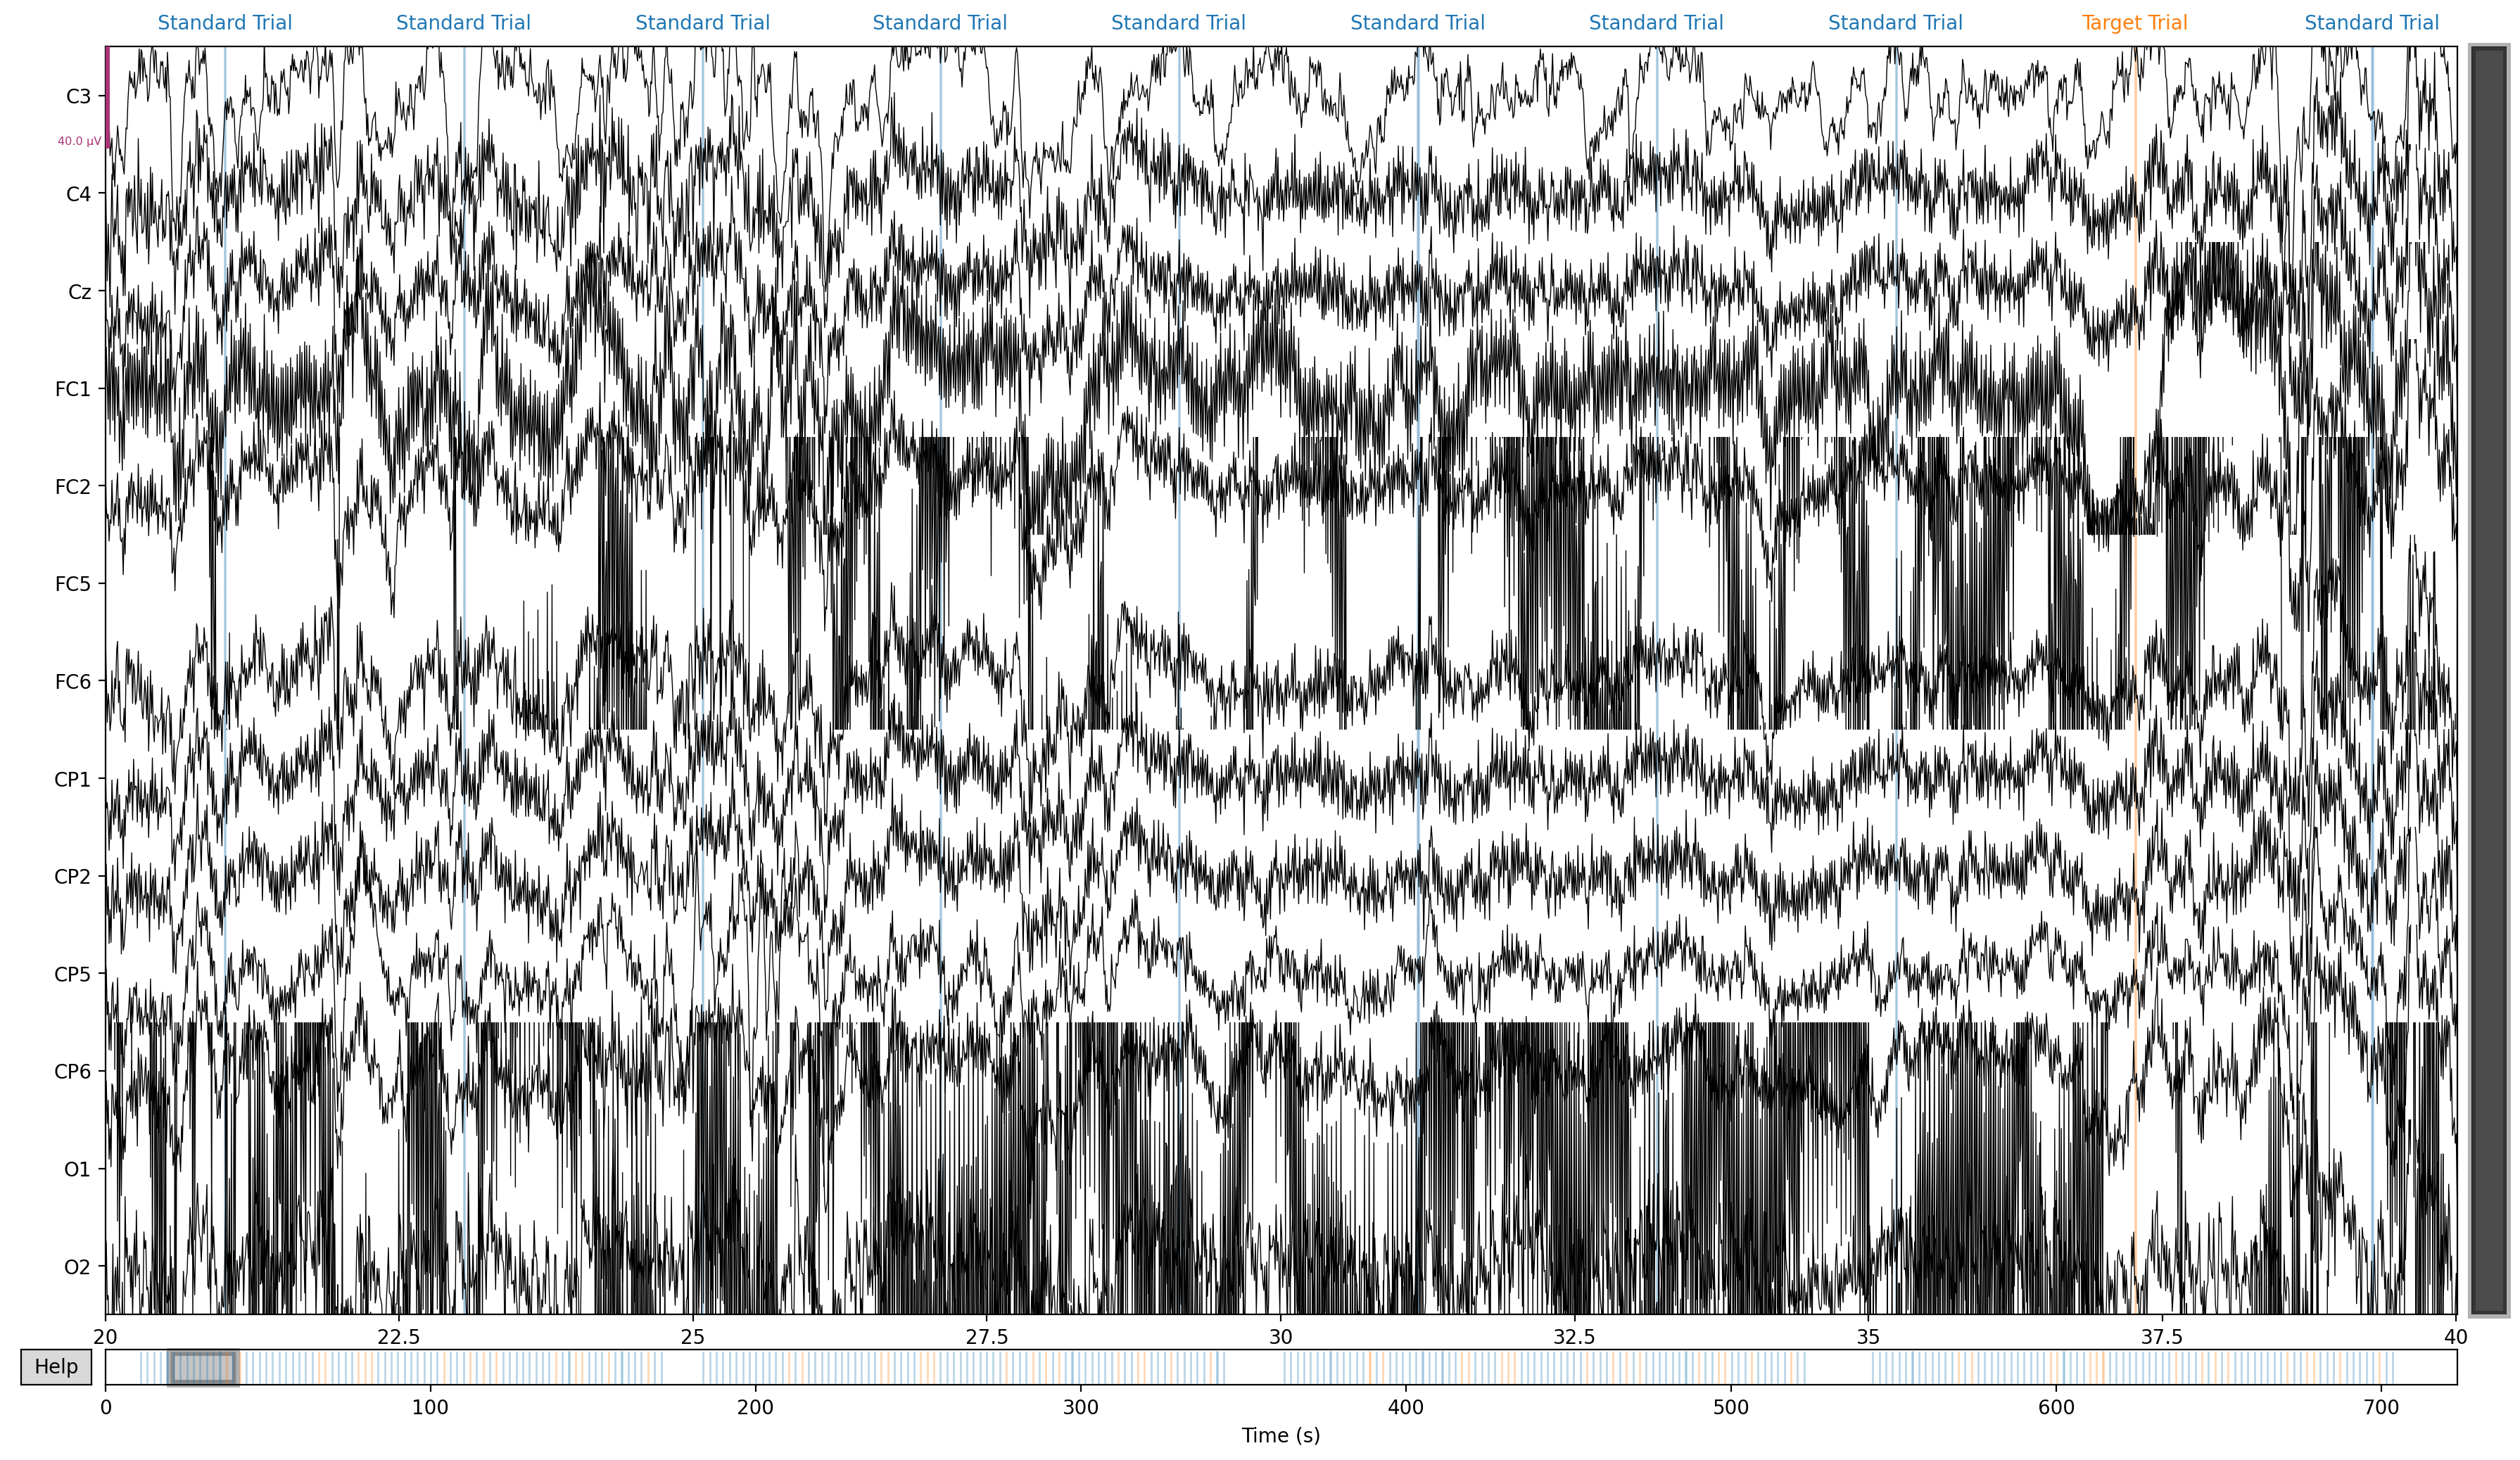

Channels marked as bad:
['FC5', 'O1']


In [5]:
raw.plot(duration=20,start=20)

In [6]:
raw.drop_channels(raw.info['bads'])

<RawArray | 11 x 90415 (723.3 s), ~7.6 MB, data loaded>

## Epoching

In [21]:
events_from_annot, event_dict = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events_from_annot, tmin=-0.2, tmax=0.5, event_id=event_dict,detrend=0,baseline= (-0.2,0),preload=True)



Used Annotations descriptions: ['Standard Trial', 'Target Trial']
Not setting metadata
320 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 88 original time points ...
0 bad epochs dropped


## Plot Epochs

In [27]:
fig, ax = plt.subplots(3,2)

epochs['Target Trial'].plot_image(picks='eeg', combine='mean',axes=ax[:,0],title="standard")
epochs['Standard Trial'].plot_image(picks='eeg', combine='mean',axes=ax[:,1],title="odd")

plt.show


Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
Not setting metadata
237 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


<function matplotlib.pyplot.show(*, block=None)>

### Plot evoked data

No projector specified for this dataset. Please consider the method self.add_proj.


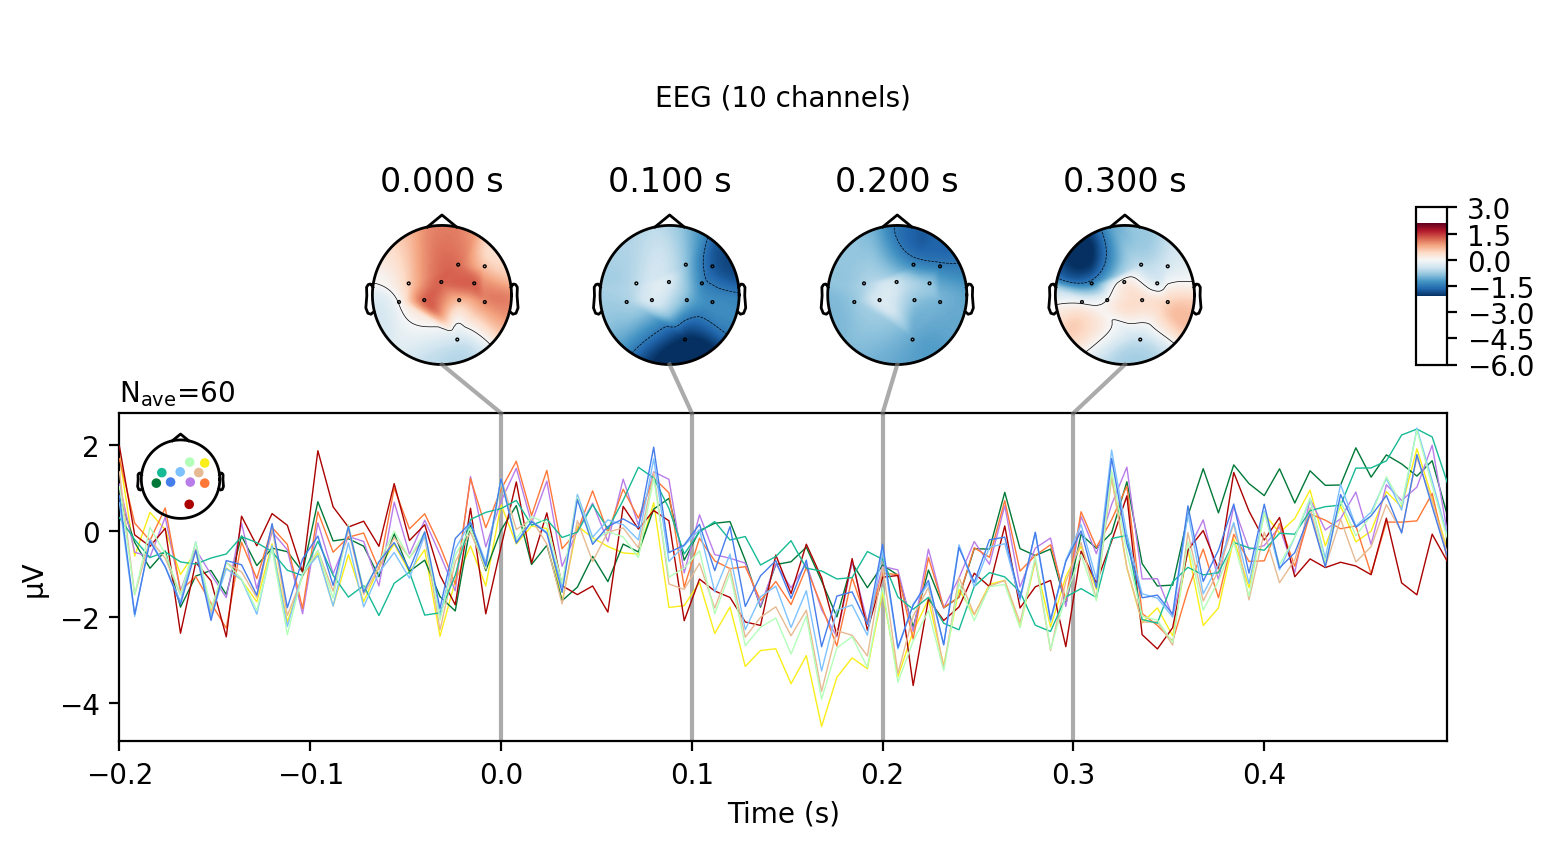

In [38]:
fig, ax = plt.subplots(2)


par_picks = ['CP1','CP2'] # to plot only parietal

odd_evoked =  epochs['Target Trial'].average()
stand_evoked =  epochs['Standard Trial'].average()


odd_evoked.plot_joint(picks='eeg',times=[0,0.1,0.2,0.3])




In [42]:
fig, ax = plt.subplots(2)



P300_window = [0.25,0.4]
par_picks = ['CP1','CP2'] # to plot only parietal


odd_evoked.plot(gfp=True,
    highlight=P300_window,axes=ax[0],titles='odd')

stand_evoked.plot(gfp=True,
    highlight=P300_window,axes=ax[1],titles='standard')

plt.show()

In [40]:
mne.viz.plot_compare_evokeds(dict(stand=stand_evoked, odd=odd_evoked),combine='mean',show_sensors= True,vlines= [0.3] )

combining channels using "mean"
combining channels using "mean"


[<Figure size 1600x1200 with 2 Axes>]

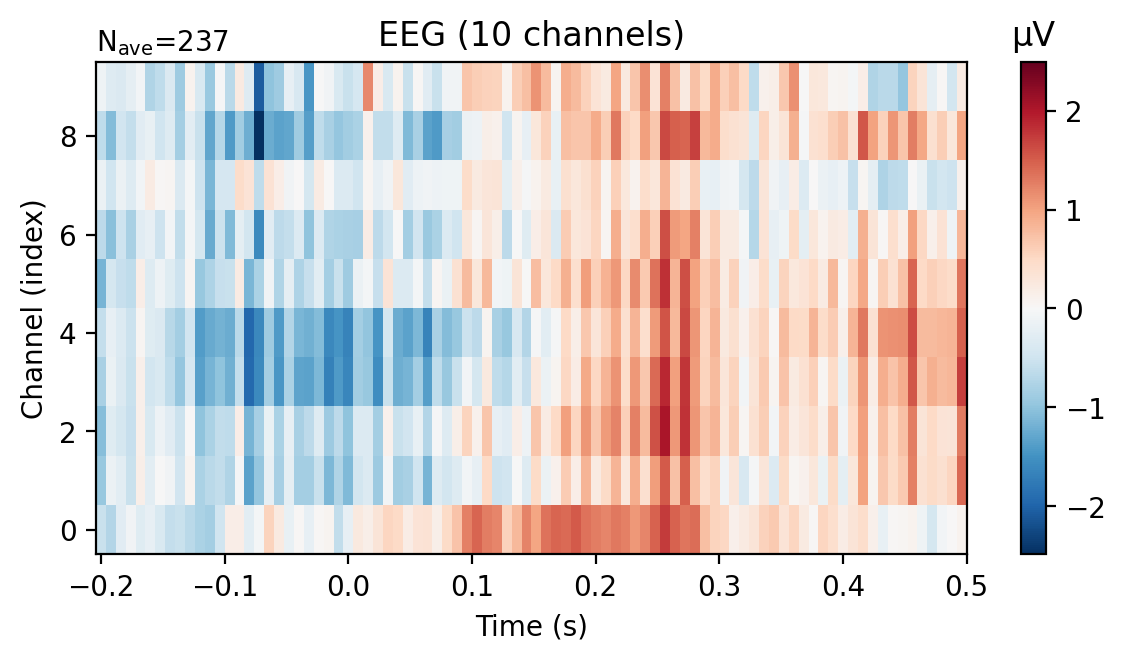

In [41]:
stand_evoked.plot_image()

In [28]:
# Each electrode indvidually 

mne.viz.plot_compare_evokeds(dict(stand=stand_evoked, odd=odd_evoked),axes='topo',vlines=[0,0.3])

[<Figure size 3584x1888 with 10 Axes>]